In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
file_path = r"C:\Users\MSI\Desktop\ML Internship\Data Set For Task\1) iris.csv"
df = pd.read_csv(file_path)

In [6]:
catergorical_columns = ["species"]
numerical_columns = ["sepal_length"  ,"sepal_width"  ,"petal_length", "petal_width"]

In [7]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head(5))
print("\nMissing values per column:\n", df.isnull().sum())

Shape of dataset: (150, 5)

First 5 rows:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Missing values per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:
# df.isnull().sum()
# df.dropna()
# df.fillna(0)

In [9]:
# describe all numbercal data types
# show all percentiles, range, mean, and standard deviation
# help check for outliers, understand the range of each variable
df.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

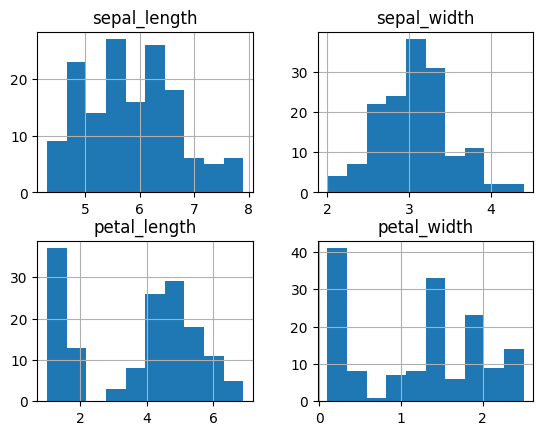

In [10]:
# df.plot()
df.hist()

In [11]:
# df["sepal_length"].plot()

<Axes: >

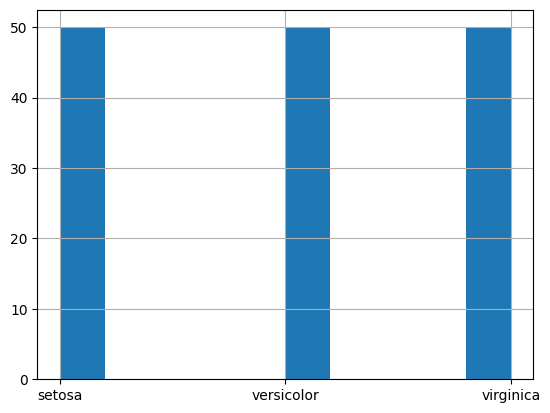

In [12]:
df["species"].hist()

In [13]:
# Numerical data:
# df["sepal_length"] = (df["sepal_length"] - df["sepal_length"].mean())/df["sepal_length"].std()

In [14]:
# (np.float64(5.843333333333334), np.float64(0.828066127977863))
# df["sepal_length"].mean(),  df["sepal_length"].std()

In [15]:
for col in numerical_columns:
    df[col] = (df[col] - df[col].mean())/df[col].std()

In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.684342e-16,-6.158037e-16,1.894781e-16,-1.894781e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.430844e+00,-1.563497e+00,-1.439627e+00
25%,-8.976739e-01,-5.858010e-01,-1.223442e+00,-1.177559e+00
50%,-5.233076e-02,-1.245404e-01,3.351431e-01,1.327811e-01
75%,6.722490e-01,5.673506e-01,7.602119e-01,7.879511e-01
max,2.483699e+00,3.104284e+00,1.780377e+00,1.705189e+00


In [17]:
classes = df["species"].unique().tolist()
classes

['setosa', 'versicolor', 'virginica']

In [18]:
# df["species_sitosa"] = df["species"].apply(lambda x: int(classes.index(x) == 0))
# df["species_sitosa"]

In [19]:
# df = df.drop("species_sitosa", axis = 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
enc = OneHotEncoder(categories=["species"])

In [22]:
# df[catergorical_columns]

In [23]:
X = df[numerical_columns]
y = df[catergorical_columns]
X, y

(     sepal_length  sepal_width  petal_length  petal_width
 0       -0.897674     1.028611     -1.336794    -1.308593
 1       -1.139200    -0.124540     -1.336794    -1.308593
 2       -1.380727     0.336720     -1.393470    -1.308593
 3       -1.501490     0.106090     -1.280118    -1.308593
 4       -1.018437     1.259242     -1.336794    -1.308593
 ..            ...          ...           ...          ...
 145      1.034539    -0.124540      0.816888     1.443121
 146      0.551486    -1.277692      0.703536     0.918985
 147      0.793012    -0.124540      0.816888     1.050019
 148      0.430722     0.797981      0.930239     1.443121
 149      0.068433    -0.124540      0.760212     0.787951
 
 [150 rows x 4 columns],
        species
 0       setosa
 1       setosa
 2       setosa
 3       setosa
 4       setosa
 ..         ...
 145  virginica
 146  virginica
 147  virginica
 148  virginica
 149  virginica
 
 [150 rows x 1 columns])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [26]:
from sklearn.linear_model import LogisticRegression 

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
lr.predict([[5,5,2,2,]])

C:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [29]:
y_predicted = lr.predict(X_test)

In [30]:
# encoder = OneHotEncoder(categories=["species"])
# # Fit and transform
# species_encoded = encoder.fit_transform(df[['species']])

# # Get column names from encoder
# encoded_cols = encoder.get_feature_names_out(['species'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score,precision_score,accuracy_score,f1_score


In [56]:
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predicted = lr.predict(X_test)
    recall = recall_score(y_test, y_predicted, average="micro")
    precision = precision_score(y_test, y_predicted, average="micro")
    acc = accuracy_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted, average="micro")

    print(f"for k={k}, acc = {acc}, f1 = {f1}, recall = {recall}, precision = {precision}")

for k=1, acc = 0.9666666666666667, f1 = 0.9666666666666667, recall = 0.9666666666666667, precision = 0.9666666666666667
for k=2, acc = 0.9666666666666667, f1 = 0.9666666666666667, recall = 0.9666666666666667, precision = 0.9666666666666667
for k=3, acc = 0.9666666666666667, f1 = 0.9666666666666667, recall = 0.9666666666666667, precision = 0.9666666666666667
for k=4, acc = 0.9666666666666667, f1 = 0.9666666666666667, recall = 0.9666666666666667, precision = 0.9666666666666667
for k=5, acc = 0.9666666666666667, f1 = 0.9666666666666667, recall = 0.9666666666666667, precision = 0.9666666666666667
for k=6, acc = 0.9666666666666667, f1 = 0.9666666666666667, recall = 0.9666666666666667, precision = 0.9666666666666667
for k=7, acc = 0.9666666666666667, f1 = 0.9666666666666667, recall = 0.9666666666666667, precision = 0.9666666666666667
for k=8, acc = 0.9666666666666667, f1 = 0.9666666666666667, recall = 0.9666666666666667, precision = 0.9666666666666667
for k=9, acc = 0.9666666666666667, f1 = 

C:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConv

In [58]:
y_predicted = lr.predict(X_test)

In [59]:

confusion_matrix(y_test, y_predicted)

array([[23,  0,  0],
       [ 0, 27,  2],
       [ 0,  1, 22]])

In [60]:
recall_score(y_test, y_predicted, average=None)

array([1.        , 0.93103448, 0.95652174])

In [61]:
precision_score(y_test, y_predicted, average=None)

array([1.        , 0.96428571, 0.91666667])